<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/ud_l3_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.nn import relu,softmax
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import math

In [2]:
print(tf.__version__)

2.2.0


In [8]:
dataset,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete74XM30/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete74XM30/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [9]:
train_dataset,test_dataset=dataset['train'],dataset['test']

Explore the data:

In [24]:
number_of_training=metadata.splits['train'].num_examples
number_of_testing=metadata.splits['test'].num_examples

In [23]:
number_of_training

60000

Normalize the data so that the values will be between 0 and 1

In [13]:
def normalize(images,labels):
  images=tf.cast(images,float)
  images/=255
  return images,labels

In [14]:
train_dataset=train_dataset.map(normalize)

In [15]:
test_dataset=test_dataset.map(normalize)

Plot an image using pyplot

In [18]:
for image, label in train_dataset.take(1):
  break
image=image.numpy().reshape(28,28)

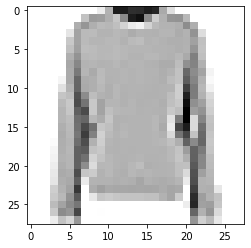

In [21]:
plt.imshow(image,cmap=plt.cm.binary)

In [25]:
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(buffer_size=number_of_training).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [27]:
model=tf.keras.Sequential([Flatten(input_shape=(28,28,1)),
                           Dense(units=128,activation=relu),
                           Dense(units=10,activation=softmax)])

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(train_dataset,epochs=5,batch_size=BATCH_SIZE,steps_per_epoch=number_of_training/BATCH_SIZE)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2806 - accuracy: 0.8959
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2669 - accuracy: 0.9030
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2561 - accuracy: 0.9040
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2460 - accuracy: 0.9086
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2375 - accuracy: 0.9124


Evaluate model using test data set.

In [58]:
test_loss,test_accuracy=model.evaluate(test_dataset)
print('test loss:{},test_accuracy:{}'.format(test_loss,test_accuracy))

313/313 [==============================] - 2s 8ms/step - loss: 0.3387 - accuracy: 0.8822
test loss:0.33866170048713684,test_accuracy:0.8822000026702881


In [37]:
predictions=model.predict(test_dataset)

In [59]:
for image_test,image_label in test_dataset.take(1):
  image_test=image_test.numpy()
  image_label=image_label.numpy()
  predictions=model.predict(image_test)

In [60]:
predictions.shape

(32, 10)

In [61]:
for i in range(image_label.shape[0]):
  print('original label: {}, predicted label: {}'.format( image_label[i], predictions[i].argmax()))

original label: 4, predicted label: 4
original label: 4, predicted label: 4
original label: 9, predicted label: 5
original label: 7, predicted label: 7
original label: 5, predicted label: 5
original label: 1, predicted label: 1
original label: 0, predicted label: 0
original label: 5, predicted label: 5
original label: 7, predicted label: 7
original label: 4, predicted label: 4
original label: 0, predicted label: 0
original label: 8, predicted label: 8
original label: 2, predicted label: 2
original label: 3, predicted label: 3
original label: 9, predicted label: 9
original label: 0, predicted label: 0
original label: 7, predicted label: 7
original label: 7, predicted label: 7
original label: 2, predicted label: 2
original label: 2, predicted label: 2
original label: 0, predicted label: 0
original label: 4, predicted label: 4
original label: 4, predicted label: 4
original label: 4, predicted label: 2
original label: 2, predicted label: 3
original label: 7, predicted label: 7
original lab

In [50]:
image_label.shape[0]

32